<div style="border:solid purple 2px; padding: 20px"> 

Привет Марк! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указавать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

Мне понравился твой проект, есть пару замечаний, но их не много, я думаю ты быстро справишься. Жду твою работу на повторное ревью :)


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Спасибо, за быструю доработку комментариев! Все моменты были исправлены, так что работу я принимаю. Единственное просьба, при доработке проекта как-то выделять исправления (лучше цветом), чтобы нам, ревьюерам, было сразу видно, что поменялось. Это сократит время повторной проверки) 
    
Также просьба проверять проект на работоспособность. В последней модели была опечатка, поэтому код в ячеке не выполнялся. После того как ты доделал и завершил работу, можешь перепроверять ее. Для этого кликай `Kernel - Restart & Run All`, и смотри, все ли работает.
    
Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных

**Признаки**

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

**Целевой признак**

    Exited — факт ухода клиента

## Подготовка данных

In [1]:
# Импортирование библиотек:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Загрузка датасета:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Основная информация о данных:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# Проверим колонки датафрейма на пропуски:
for i in df.columns:
    print(i, df[i].isna().sum())

RowNumber 0
CustomerId 0
Surname 0
CreditScore 0
Geography 0
Gender 0
Age 0
Tenure 909
Balance 0
NumOfProducts 0
HasCrCard 0
IsActiveMember 0
EstimatedSalary 0
Exited 0


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

А можно было так
    
    df.isna().sum()

In [5]:
# Приведём названия столбцов к нижнему регистру:
df.columns = df.columns.str.lower()

In [6]:
# Заполним столбец с пропусками:
df = df.fillna(np.random.randint(df['tenure'].min(), df['tenure'].max()))

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Все же удалить 9% данных, это очень много, теряем довольно большую часть данных. Как можно было поступить:
    
- распределение по `Tenure` ровномерное, если сейчас заменить почти 900 пропусков (9% данных) средним или медианой, то мы значительно исказим распределение. В таком случае можно заполнить пропуски случайными значениями в интервале от минимального до максимального значения по данному столбцу.

- Так как значений в этом признаке ограниченное количество, можно сделать его категориальным признаком. Пропуски можно считать как за отдельную категорию (заполнить значением -1). Затем заменить тип данных `Tenure` на `object` и применить технику [OHE](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

<div class="alert alert-warning">
<h2> Комментарий ревьюера v2 ⚠️ <a class="tocSkip"> </h2>

На самом деле, при такой реализации ты заменяешь все пропуски одним числом, это ты можешь проверить вывев распределение по столбцу. Чтобы при замене использовались разные числа нужно сделать что-то похожее на это
    
    data.loc[data['Tenure'].isna(), 'Tenure'] = [random.randint(min(data['Tenure']), max(data['Tenure'])) for i in
                                                 range(data['Tenure'].isna().sum())]

                                                 

In [7]:
print(df['geography'].unique())
print(df['gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [8]:
# Удалим столбец с фамилиями клиентов, так как они только мешает и при необходимсоти информацию о клиенте можно получить через Customer ID
df = df.drop(['rownumber', 'surname', 'customerid'], axis = 1)


<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Удалить неинформативные столбцы - правильное решение. Но как насчет `CustomerId`? Правильно ли, что наша модель будет зависеть от ID клиента...

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

И можно короче

    df = df.drop(['RowNumber', 'Surname'], axis = 1)

In [9]:
df = pd.get_dummies(df, drop_first=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

В данном случае это наиболее подходящий способ закодировать категориальные колонки 👍 И отдельный плюс за `drop_first`. И можно было так
    
    df = pd.get_dummies(df, drop_first=True)

In [10]:
# Проверка на дубликаты:
df.duplicated().sum()

0

In [11]:
# Разбиение данных на две выборки
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 12345)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты фиксируешь `random_state`. Кстати, его можно задать один раз в начале проекта, например, используя любимый нами [numpy](https://pyprog.pro/random_sampling_functions/seed.html?)

In [12]:
# Проверим размеры полученных выборок:
print(df_train.shape)
print(df_test.shape)

(7000, 12)
(3000, 12)


In [13]:
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

## Исследование задачи

<AxesSubplot:>

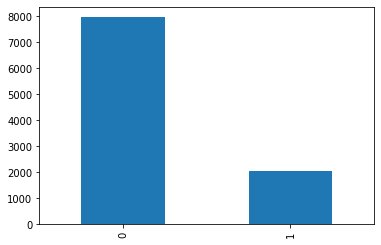

In [14]:
df['exited'].value_counts().plot(kind='bar')

Как видно наблюдается сильный дисбаланс классов

In [15]:
# Рассмотрим в какой пропорции распределён целевой параметр exited:

(((df['exited'] == 1).sum() / df['exited'].count()) * 100).round(1)

# Примерно 20% клиентов ушли, следовательно класс [0] встречается примерно в 5 раз чаще чем класс [1]

20.4

In [40]:
# Дерево:

# С помощью модуля GridSearchCV определим оптимальные значения гиперпараметров модели:

model_cv_test = DecisionTreeClassifier()

parametrs = { 'max_depth': range (1,31, 2),
              'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,20,2) }

grid = GridSearchCV(model_cv_test, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

GridSearchCV - шикарная штука, и очень похвально, что ты его используешь. Но только тогда нам не нужно выделять валидационную выборку, ведь внутри GridSearchCV зашита кроссвалидация, и получается мы не до конца используем потенциал наших данных, потому что меньше данных отдаем на обучение. Раз ты используешь GridSearchCV, то разбивай данные в проекте только на две выборки

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Вижу исправил, но хорошо бы отмечать свои исправления, так сразу было бы понятно, что изменилось

F1: 0.5476673427991887


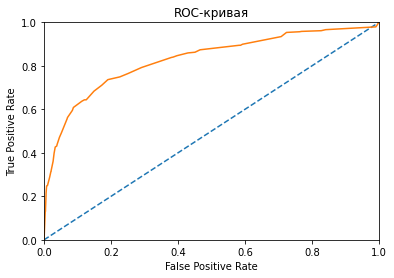

In [17]:
# Обучим модель без учёта дизбаланса классов:

# # Обучим модель дерева:

model_tree = DecisionTreeClassifier(random_state=12345, max_depth=7, min_samples_leaf=3, min_samples_split=18)
model_tree.fit(features_train, target_train)
predictions = model_tree.predict(features_test)
print("F1:", f1_score(target_test, predictions))

probabilities = model_tree.predict_proba(features_test)
probabilities_one_test = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
# Для сравнения отобразим ROC-кривую случайной модели:
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [39]:
# Случайны лес:

# С помощью модуля GridSearchCV определим оптимальные значения гиперпараметров модели:
model_cv_test = RandomForestClassifier()

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,31, 2),
              'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,20,2) }

grid = GridSearchCV(model_cv_test, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_

F1: 0.5578093306288032


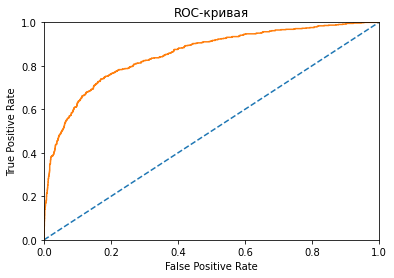

In [19]:
# Обучим модель без учёта дизбаланса классов:

# Случайный лес:

model_forest = RandomForestClassifier(random_state=12345, max_depth=25, n_estimators=30, min_samples_leaf=3, min_samples_split=10)
model_forest.fit(features_train, target_train)
predictions = model_forest.predict(features_test)
print("F1:", f1_score(target_test, predictions))

probabilities = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
# Для сравнения отобразим ROC-кривую случайной модели:
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Как видно модель логистической регресии с сильным дизбалансом классов близка к случайной модели

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

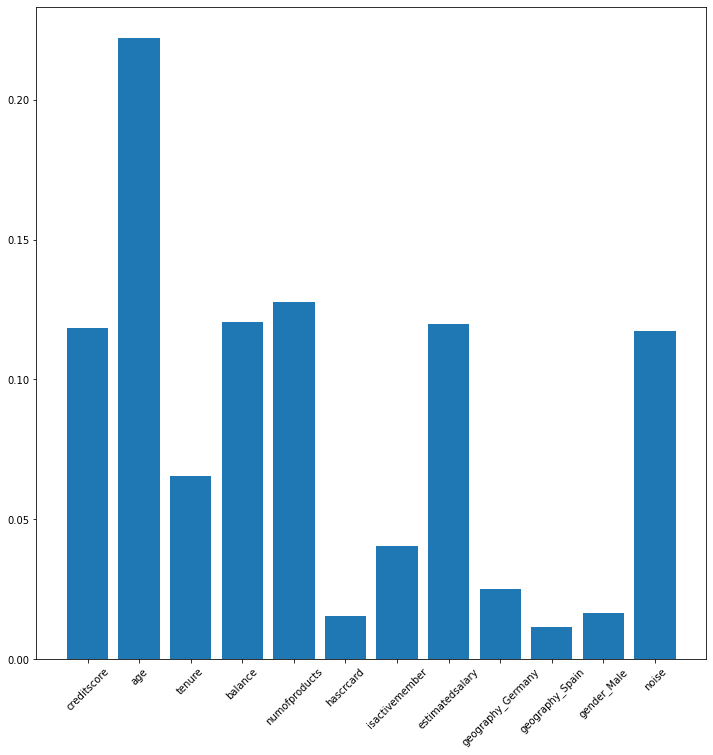

In [20]:
# Исследуем важность признаков для модели:
X = df.copy()
X['noise'] = np.random.randn(len(df))
clf = RandomForestClassifier()
clf.fit(X.drop('exited', axis=1), X['exited'])
plt.figure(figsize=(12,12))
plt.bar(X.drop('exited', axis=1).columns, clf.feature_importances_)
plt.xticks(rotation=45)

In [21]:
clf.feature_importances_

array([0.11821019, 0.22206898, 0.06545391, 0.12061097, 0.12754102,
       0.01548034, 0.0404014 , 0.11977443, 0.02520006, 0.01154893,
       0.01635793, 0.11735184])

По полученной гистограмме можно оценить важность признаков в сравнении с 'шумом'. Самым важным признаком является возраст.

In [22]:
# Отбросим все признаки важность сопоставима с важностью шума:
X_new = X.drop(['gender_Male', 'geography_Spain', 'geography_Germany', 'isactivemember', 'hascrcard', 'tenure', 'noise', 'estimatedsalary', 'balance', 'creditscore'], axis=1)
X_new

,age,numofproducts,exited
0,42,1,1
1,41,1,0
2,42,3,1
3,39,2,0
4,43,1,0
...,...,...,...
9995,39,2,0
9996,35,1,0
9997,36,1,1
9998,42,2,1


In [23]:
# Разбиение новых данных на выборки в пропорции 3:1:1
df_train, df_test = train_test_split(X_new, test_size = 0.3, random_state = 12345)

In [24]:
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

In [25]:
# Обучим модель без учёта дизбаланса классов:

# # Обучим модель дерева:

model_tree = DecisionTreeClassifier(random_state=12345, max_depth=7, min_samples_leaf=5, min_samples_split=18)
model_tree.fit(features_train, target_train)
predictions = model_tree.predict(features_test)
print("F1:", f1_score(target_test, predictions))

F1: 0.5151515151515151


<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Индикаторы состояния: progress и tqdm <a class="tocSkip"> </h3>

Как перестать беспокоиться о том, не завис ли скрипт? Вы можете создавать свои индикаторы состояния. Это весьма увлекательное занятие. Но делать то же самое с [progress](https://pypi.org/project/progress/) (ее обычно используют для работы из консоли) или [tqdm](https://pypi.org/project/tqdm/) (отлично подойдет для тетрадок) куда быстрее и надежнее.

Обычно я использую эти две библиотеки, но вот [здесь](https://habr.com/ru/post/483400/) ты можешь почитать про альтернативные варианты

![](https://i.ibb.co/B4SDm8Y/68747470733a2f2f7261772e6769746875622e636f6d2f7665726967616b2f70726f67726573732f6d61737465722f64656d.gif)

In [26]:
# Обучим модель без учёта дизбаланса классов:

# Случайный лес:

model_forest = RandomForestClassifier(random_state=12345, max_depth=25, n_estimators=30, min_samples_leaf=3, min_samples_split=10)
model_forest.fit(features_train, target_train)
predictions = model_forest.predict(features_test)
print("F1:", f1_score(target_test, predictions))

F1: 0.4750795334040297


Как видно показатели модели ухудшились, возвращаемся к старым данным

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Да, предсказуемо, слишком много полезной информации удаляем

In [27]:
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 12345)

features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

## Борьба с дисбалансом

In [35]:
# Добавим новый гиперпараметр и переберём старые:

model_cv_test = DecisionTreeClassifier()

parametrs = { 'max_depth': range (1,31, 2),
              'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,20,2), 
              'class_weight':[{0: w} for w in [1, 2, 4, 6, 10]]}

grid = GridSearchCV(model_cv_test, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_

F1: 0.5459999999999999


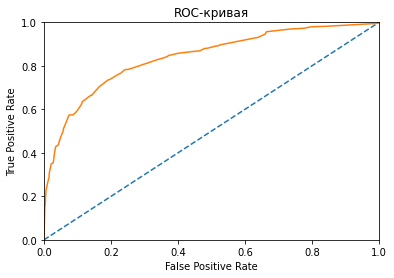

In [29]:
# Сбалансируем вес классов:

model_tree = DecisionTreeClassifier(random_state=12345, max_depth=7, min_samples_leaf=9, min_samples_split=4, class_weight={0: 1})
model_tree.fit(features_train, target_train)
predictions = model_tree.predict(features_test)
print("F1:", f1_score(target_test, predictions))

probabilities = model_tree.predict_proba(features_test)
probabilities_one_test = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
# Для сравнения отобразим ROC-кривую случайной модели:
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

При добавлении нового гиперпараметра, остальные нужно переподбирать - ведь в этом случае модель у нас другая. То же самое и при изменении обучающей выборки, при ее изменении подбор нужно осуществлять заново

In [ ]:
# Добавим новый гиперпараметр и переберём старые:

model_cv_test = RandomForestClassifier()

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,31, 2),
              'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,20,2),
              'class_weight':[{0: w} for w in [1, 2, 4, 6, 10]]}

grid = GridSearchCV(model_cv_test, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_

F1: 0.5578093306288032


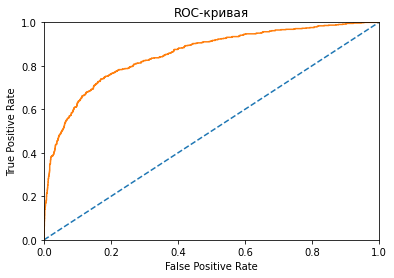

In [30]:
# Сбалансируем вес классов:

model_forest = RandomForestClassifier(random_state=12345, max_depth=25, n_estimators=30, min_samples_leaf=3, min_samples_split=10, class_weight={0: 1})
model_forest.fit(features_train, target_train)
predictions = model_forest.predict(features_test)
print("F1:", f1_score(target_test, predictions))

probabilities = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
# Для сравнения отобразим ROC-кривую случайной модели:
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [31]:
len(df_train.loc[df_train['exited']==0]) / len(df_train.loc[df_train['exited']==1])

3.961020552799433

In [32]:
# Решим проблему дисбаланса классов методом upsampling:

Y = df_train.loc[df_train['exited']==1]
Y = Y.loc[Y.index.repeat(4)]
df_train_new = pd.concat([df_train.loc[df_train['exited']==0], Y]).sample(frac=1)
df_train_new['exited'].value_counts()

1    5644
0    5589
Name: exited, dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Хорошо бы под это написать функцию отдельную

In [33]:
features_train = df_train_new.drop(['exited'], axis=1)
target_train = df_train_new['exited']

features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

In [34]:
model_cv_test = DecisionTreeClassifier()

parametrs = { 'max_depth': range (1,31, 2),
              'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,20,2), }

grid = GridSearchCV(model_cv_test, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_

{'max_depth': 27, 'min_samples_leaf': 1, 'min_samples_split': 2}

F1: 0.4717444717444717


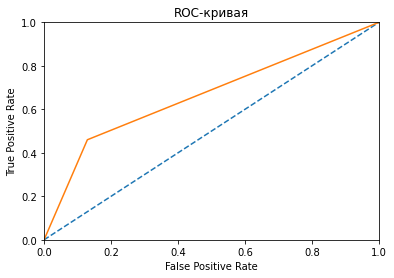

In [36]:
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=27, min_samples_leaf=1, min_samples_split=2)
model_tree.fit(features_train, target_train)
predictions = model_tree.predict(features_test)
print("F1:", f1_score(target_test, predictions))

probabilities = model_tree.predict_proba(features_test)
probabilities_one_test = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
# Для сравнения отобразим ROC-кривую случайной модели:
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [44]:
model_cv_test = RandomForestClassifier()

parametrs = {
    'criterion': (['gini', 'entropy']),
    'max_depth': range (2, 10),
    'max_features': (['log2', 'sqrt']), 
    'min_samples_leaf': range (2, 10),
    'min_samples_split': range (2, 10), }

grid = GridSearchCV(model_cv_test, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_

F1: 0.603395061728395


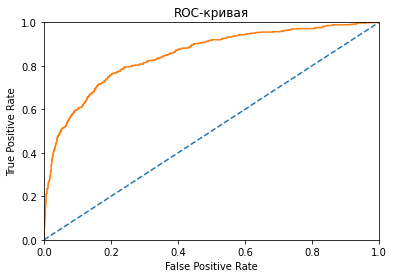

In [42]:
# model_forest = RandomForestClassifier(random_state=12345, criterion max_depth=25, n_estimators=30, min_samples_leaf=3, min_samples_split=10, class_weight={0: 1})
# код ревьюера
model_forest = RandomForestClassifier(random_state=12345, criterion='gini', max_depth=25, n_estimators=30, min_samples_leaf=3, min_samples_split=10, class_weight={0: 1})
model_forest.fit(features_train, target_train)
predictions = model_forest.predict(features_test)
print("F1:", f1_score(target_test, predictions))

probabilities = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
# Для сравнения отобразим ROC-кривую случайной модели:
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Раз проект все равно возвращается на доработку, то предлагаю попробовать еще какой-нибудь метод борьбы с дисбалансом, upsamle, downsample или еще какой-нибудь

## Тестирование модели

F1: 0.603395061728395
AUC-ROC: 0.8489907302486199


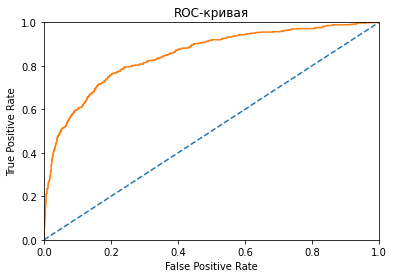

In [43]:
# Проведём тестирование модели на тестовой выборке:

predictions = model_forest.predict(features_test)
print("F1:", f1_score(target_test, predictions))

probabilities = model_forest.predict_proba(features_test)
probabilities_one_valid = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)
roc_auc_score(target_test, probabilities_one_valid)
print("AUC-ROC:", roc_auc_score(target_test, probabilities_one_valid))

plt.figure()
# Для сравнения отобразим ROC-кривую случайной модели:
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

По метрике проходим, шик)
    

<font size=10> Вывод: <font>
<font size=6> Самые лучшие показатели метрик показала модель случайного леса, исходный датасет имел сильный дисбаланс классов что сказывалось на качестве моделей, в частности делал модель логистической регрессии бесполезной, с помощью модуля GreedSearchCV были подобраны оптимальные гиперпараметры для моделей классификации. После исправления дисбаланса классов качество моделей улучшилось Полученная модель показала неплохие показатели метрик F1 и AUC-ROC на тестовой выборке.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*